# Predicting a Pulsar

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import os

### Domain Knowledge 

A pulsar signal has 2 quantities:  Pulsar's integrated pulse profile (IPP) and dispersion measure signal-to-noise ratio curve (DM-SNR curve).

Integrated pulse profile of a pulsar is essentially its fingerprint. 

Dispersion Measure is loosely defined as the integrated column density of free electrons between observer and the pulsar. Dispersion decreases the energy in the pulse causing the signal-to-noise ratio to decrease.

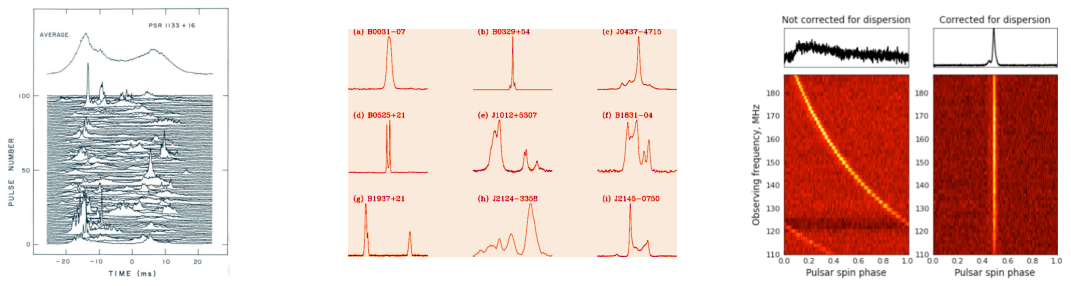

In [2]:
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 3, figsize=(20,5))
img = mpimg.imread(os.getcwd()+"/data/pulsar_IP.png")
axs[0].imshow(img)
axs[0].axis('off')

img = mpimg.imread(os.getcwd()+"/data/pulsar_IPs2.jpg")
axs[1].imshow(img)
axs[1].axis('off')

img = mpimg.imread(os.getcwd()+"/data/dm-snr3.png")
axs[2].imshow(img)
axs[2].axis('off')

plt.show()

In this dataset we have 8 statistical quantities, 4 each for the IPP and DM-SNR, as our features. 

In [3]:
dataset = pd.read_csv(os.getcwd()+"/data/HTRU_2.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [4]:
dataset.head(10)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,not_pulsar
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,not_pulsar
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,not_pulsar
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,not_pulsar
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,not_pulsar
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,not_pulsar
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,not_pulsar
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,not_pulsar
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,not_pulsar
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,not_pulsar


## Exploratory Data Analysis

Let's look at the features

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = list(dataset.columns)
cols.remove("target_class")

for feature in cols:
    dataset[feature] = scaler.fit_transform(dataset[[feature]]) 

In [6]:
import collections
print(collections.Counter(dataset['target_class']))

Counter({'not_pulsar': 16259, 'pulsar': 1639})


Looks like ~10% of the total samples belong to the positive class.

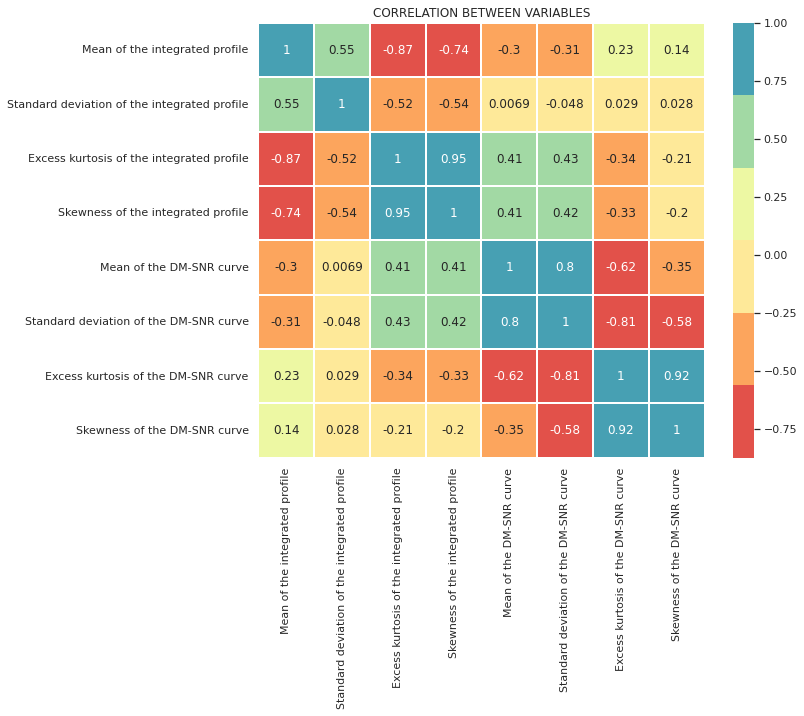

In [7]:
correlation = dataset[['Mean of the integrated profile',
                       'Standard deviation of the integrated profile',
                       'Excess kurtosis of the integrated profile',
                       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
                       'Standard deviation of the DM-SNR curve',
                       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("Spectral"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

Skew and Excess Kurtosis of the IPP are highly positively correlated. 

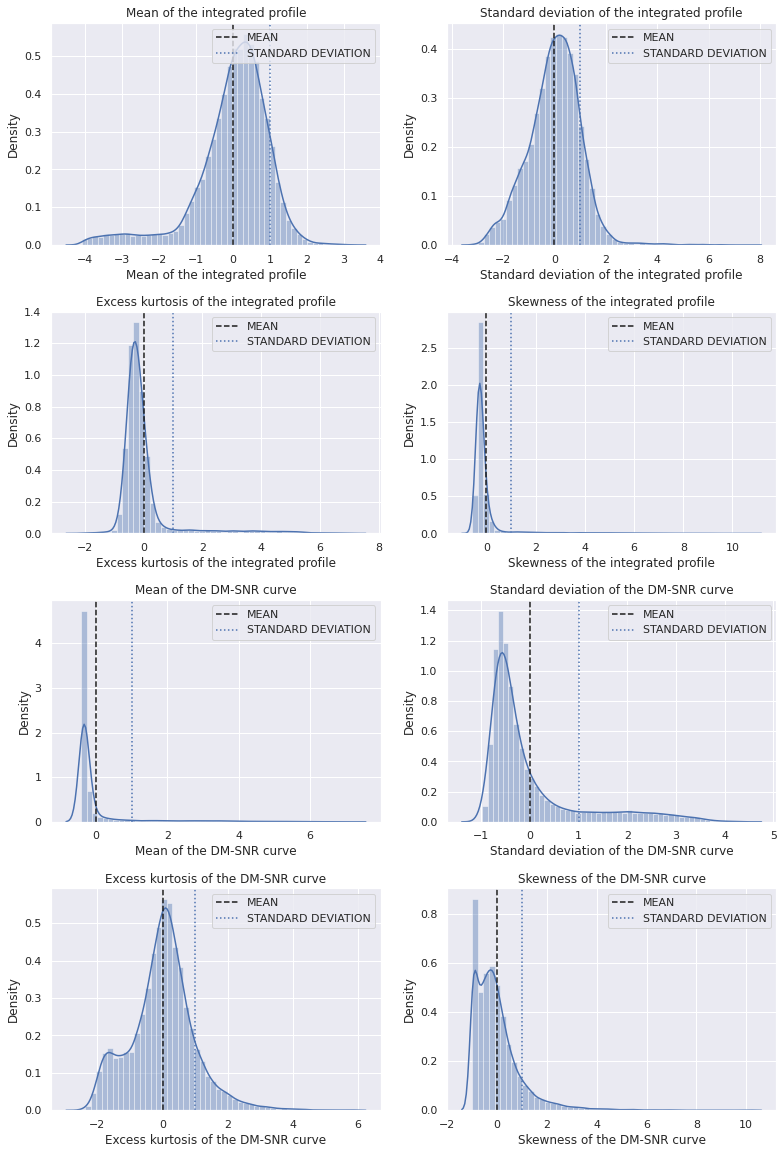

In [8]:
import itertools
columns = cols.copy()
length  = len(columns)

plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(dataset[i])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(dataset[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(dataset[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

Skewness and excess kurtosis of the DM-SNR curve look bimodal. 
Standard deviation of the DM-SNR curve has a long tail. 

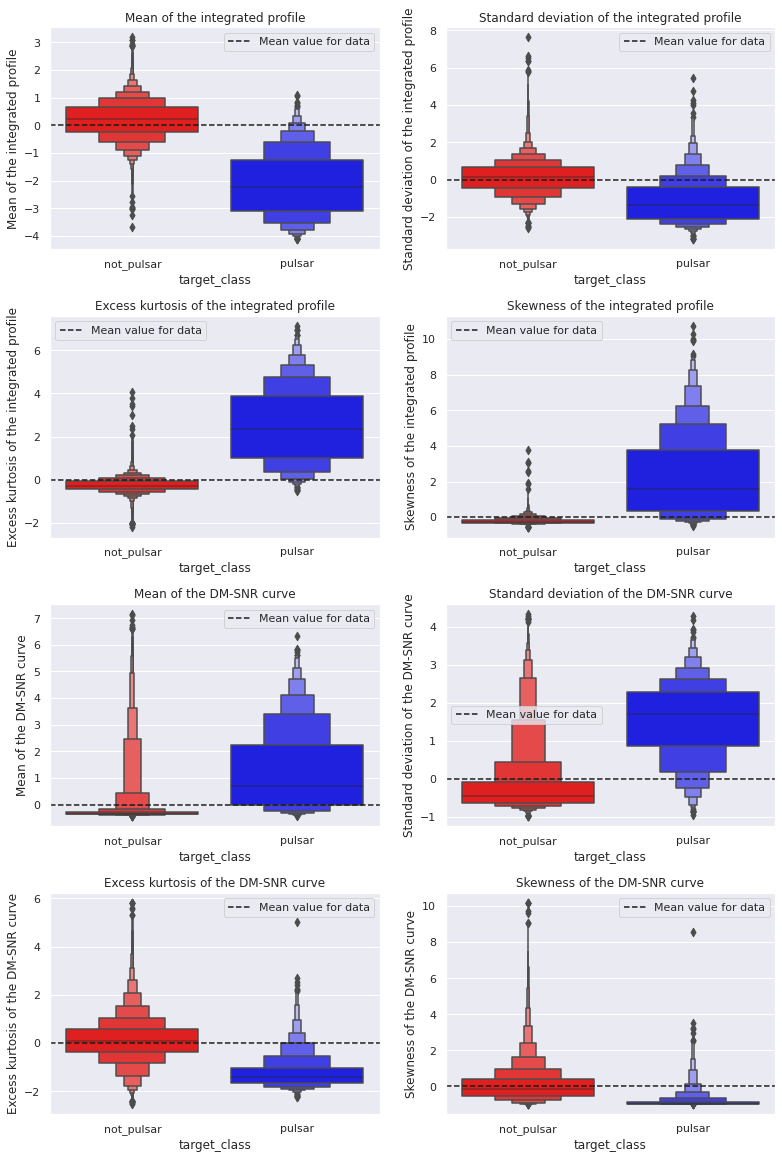

In [9]:
columns = [x for x in dataset.columns if x not in ["target_class"]]
length  = len(columns)
plt.figure(figsize=(13,20))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(4,2,j+1)
    sns.boxenplot(x=dataset["target_class"],y=dataset[i],palette=["red","blue"])
    plt.title(i)
    plt.subplots_adjust(hspace=.3)
    plt.axhline(dataset[i].mean(),linestyle = "dashed",color ="k",label ="Mean value for data")
    plt.legend(loc="best")

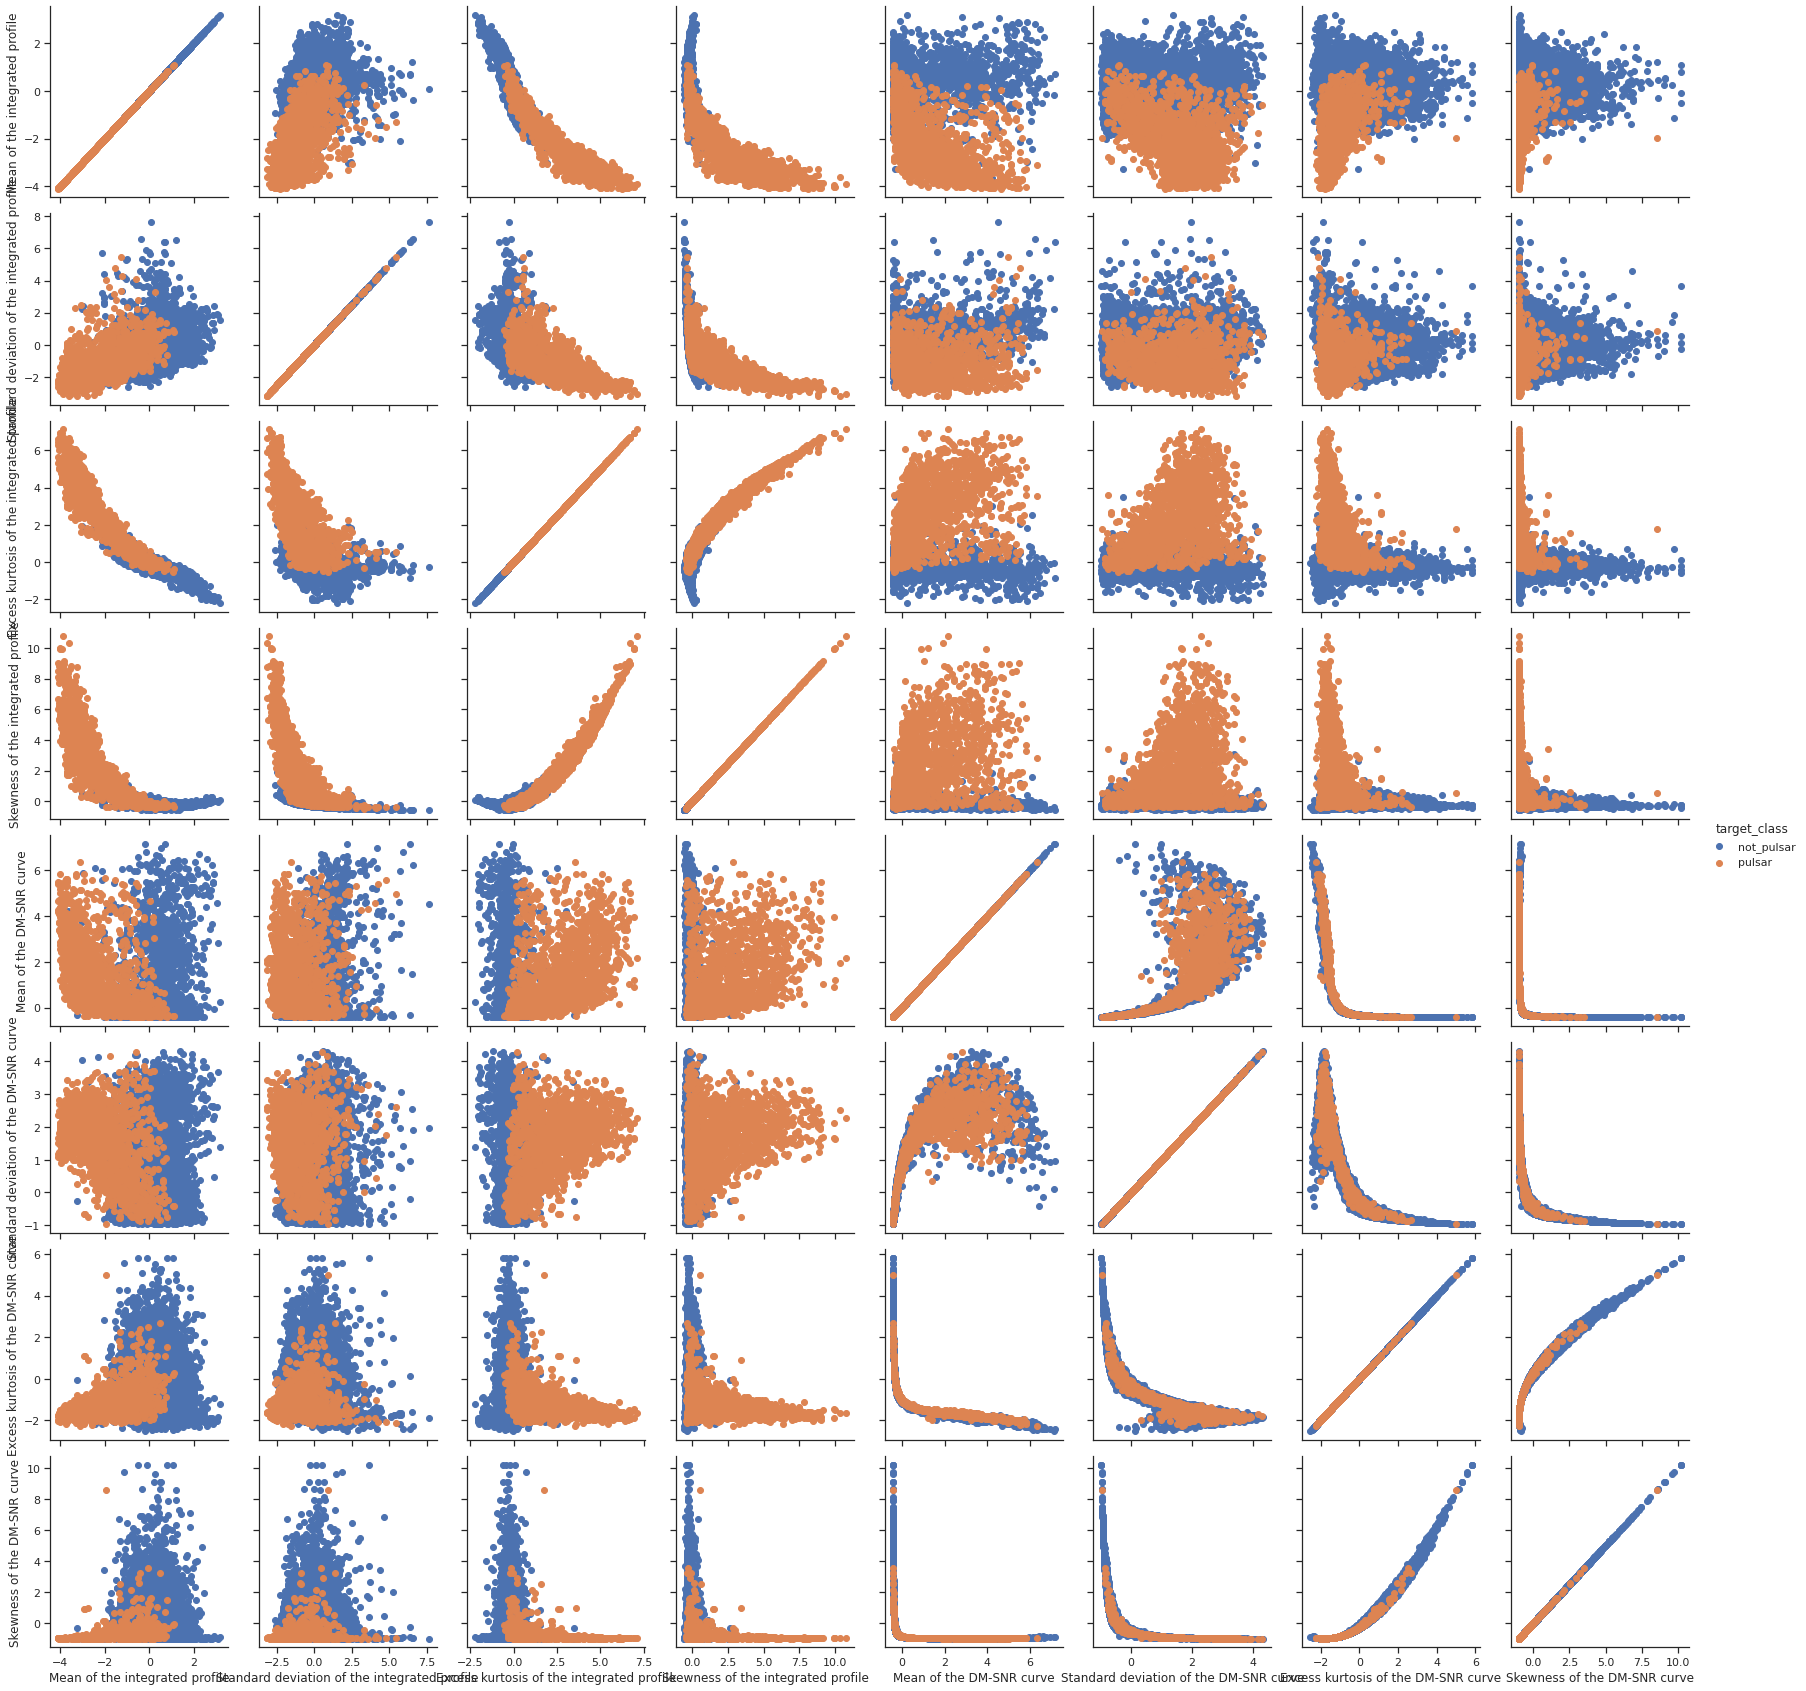

In [10]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
g = sns.PairGrid(data=dataset, hue="target_class", height=3)
g = g.map(plt.scatter)
g = g.add_legend()

# Conclusions

The mean and excess kurtosis of the integrated profile can be the top discriminatory features between the two classes. 

Since these are simple features, the team will implement from scratch <insert list of models e.g. Decision Tree, Bayes Classifier, Logistic Regression, Simple Multi-Layer Perceptron, etc.> to classify the pulsar candidates in the dataset as real pulsars vs. false candidates.